- By [lazarusA](https://lazarusa.github.io/Webpage/index.html)

In [1]:
using CairoMakie, ColorSchemes, Colors # using GLMakie

In [2]:
U = LinRange(-pi, pi, 100) # 50
V = LinRange(-pi, pi, 20)
x1 = [cos(u) + .5 * cos(u) * cos(v)      for u in U, v in V]
y1 = [sin(u) + .5 * sin(u) * cos(v)      for u in U, v in V]
z1 = [.5 * sin(v)                        for u in U, v in V]
x2 = [1 + cos(u) + .5 * cos(u) * cos(v)  for u in U, v in V]
y2 = [.5 * sin(v)                        for u in U, v in V]
z2 = [sin(u) + .5 * sin(u) * cos(v)      for u in U, v in V];

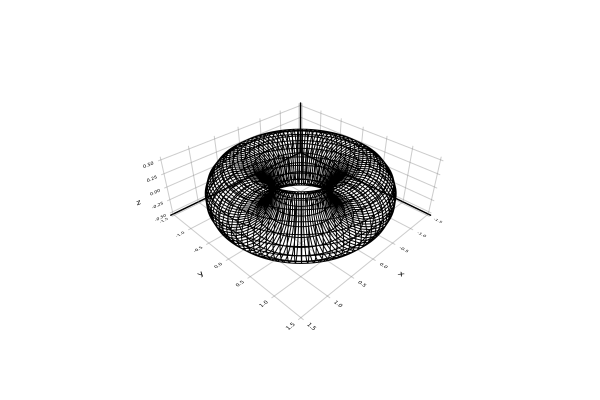

In [4]:
fig = Figure(resolution =(600,400))
ax = LScene(fig, scenekw = (camera = cam3d!, show_axis = true))
wireframe!(x1,y1,z1, shading = false)
axis = ax.scene[OldAxis]
tstyle = axis[:names]
tstyle[:textsize] = 12
tstyle[:gap] = 5
axis[:ticks][:textcolor] = :black
axis[:ticks][:textsize] = 7
fig[1,1] = ax
#save("./results/FigTori1.png", fig, px_per_unit = 1)
fig

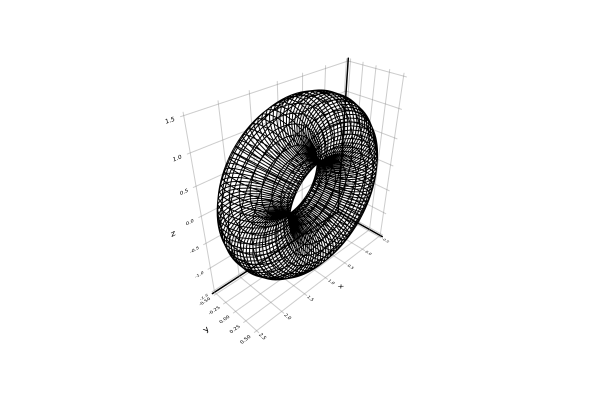

In [5]:
fig = Figure(resolution =(600,400))
ax = LScene(fig, scenekw = (camera = cam3d!, show_axis = true))
wireframe!(x2,y2,z2, shading = false)
axis = ax.scene[OldAxis]
tstyle = axis[:names]
tstyle[:textsize] = 12
tstyle[:gap] = 5
axis[:ticks][:textcolor] = :black
axis[:ticks][:textsize] = 7
fig[1,1] = ax
#save("./results/FigTori2.png", fig, px_per_unit = 1)
fig

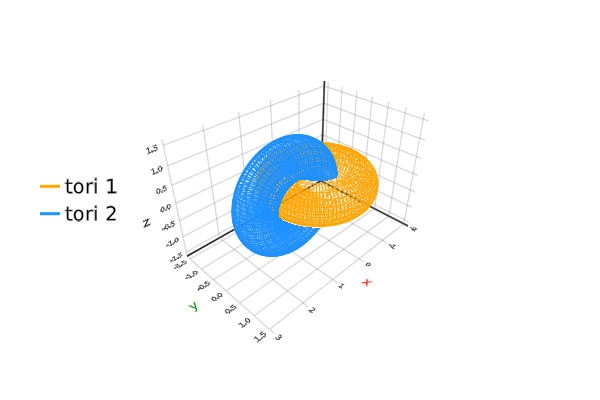

In [1]:
using GLMakie, ColorSchemes, Colors # using CairoMakie seems to fail here. 

U = LinRange(-pi, pi, 100) 
V = LinRange(-pi, pi, 20)

x1 = [cos(u) + .5 * cos(u) * cos(v)      for u in U, v in V]
y1 = [sin(u) + .5 * sin(u) * cos(v)      for u in U, v in V]
z1 = [.5 * sin(v)                        for u in U, v in V]
x2 = [1 + cos(u) + .5 * cos(u) * cos(v)  for u in U, v in V]
y2 = [.5 * sin(v)                        for u in U, v in V]
z2 = [sin(u) + .5 * sin(u) * cos(v)      for u in U, v in V]


fig = Figure(resolution =(600,400))
ax = LScene(fig, scenekw = (camera = cam3d!, show_axis = true))


ax = LScene(fig, scenekw = (camera = cam3d!, show_axis = true))
tori1 = wireframe!(ax, x1,y1,z1, shading = false, color = :orange, transparency=false)
tori2 = wireframe!(ax, x2,y2,z2, shading = false, color= :dodgerblue, transparency=true)

axis = ax.scene[OldAxis]


axis[:names, :axisnames] = ("x", "y", "z")
tstyle = axis[:names] #  get the nested attributes and work directly with them

tstyle[:textsize] = 10
tstyle[:textcolor] = (:red, :green, :black)
tstyle[:font] = "helvetica"
tstyle[:gap] = 5
axis[:ticks][:textcolor] = :black
axis[:ticks][:textsize] = 5

elem_1 = [LineElement(color = tori1[:color], linestyle = nothing)]
elem_2 = [LineElement(color = tori2[:color], linestyle = nothing)]

leg = Legend(fig, [elem_1, elem_2], ["tori 1", "tori 2"], 
    tellheight = false, tellwidth = false, 
    halign = :left, valign = :center, framevisible = false, bgcolor = :white)
fig[1, 1] = ax
fig[1, 1] = leg
#save("./results/FigTori1_2.png", fig, px_per_unit = 1)
fig

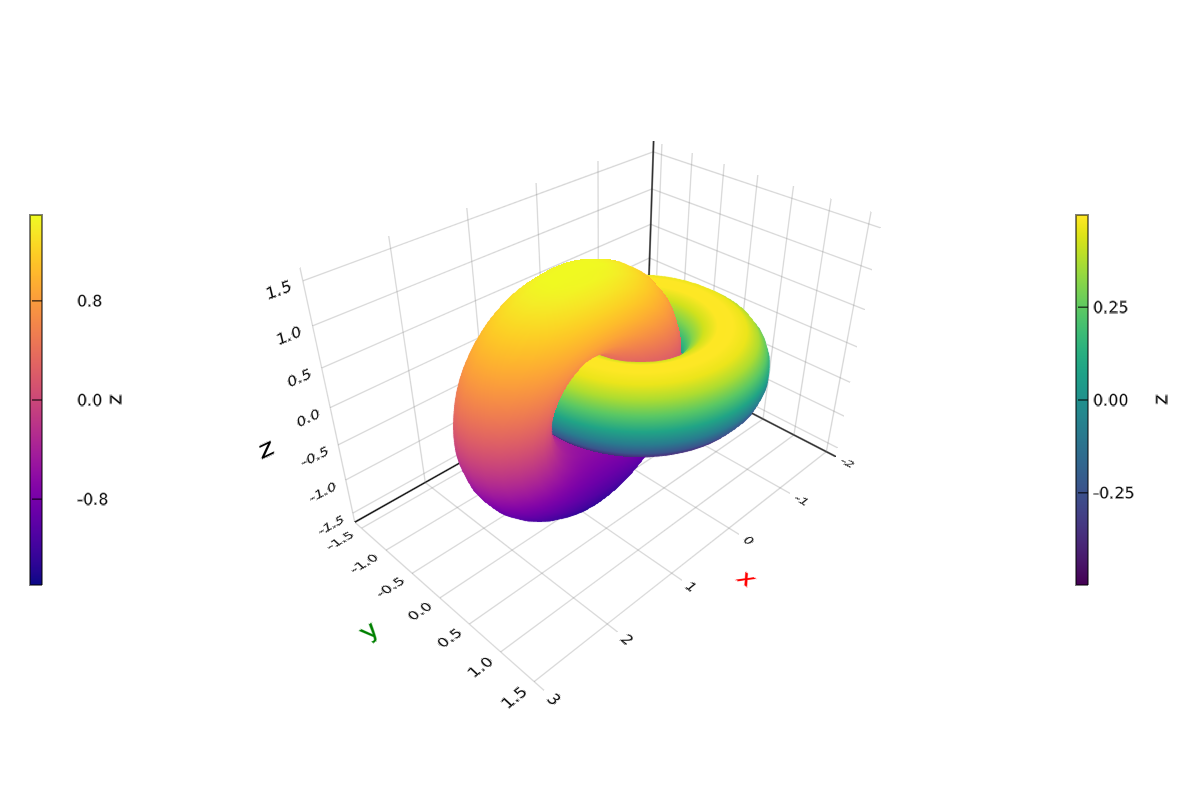

In [4]:
fig = Figure(resolution =(1200,800))
ax = LScene(fig, scenekw = (camera = cam3d!, show_axis = true))

tori1 = surface!(ax, x1, y1, z1, colormap = :viridis, shading=false)
tori2 = surface!(ax, x2, y2, z2, colormap = :plasma, shading=false)
axis = ax.scene[OldAxis]
axis[:names, :axisnames] = ("x", "y", "z")
tstyle = axis[:names] #  get the nested attributes and work directly with them

tstyle[:textsize] = 10
tstyle[:textcolor] = (:red, :green, :black)
tstyle[:font] = "helvetica"
tstyle[:gap] = 5
axis[:ticks][:textcolor] = :black
axis[:ticks][:textsize] = 5
cbar1 = Colorbar(fig, tori1, label = "z",ticklabelsize = 16,
    width = 12, height = Relative(2/4), tickalign=1, # cbar's frame
)
cbar2 = Colorbar(fig, tori2, label = "z",ticklabelsize = 16,labelpadding = -5,
    flipaxisposition= false, ticklabelpad = 35,
    width = 12, height = Relative(2/4), tickalign=1,
   )
fig[1, 2] = ax
fig[1, 3] = cbar1
fig[1, 1] = cbar2
#save("./results/FigTori1_2cmap.png", fig, px_per_unit = 1)
fig